(higher-order-odes-section)=

# Higher-order ODEs

The {prf:ref}`Euler method<euler-method-definition>` solves a first-order ODE of the form $y' = f(t, y)$, so what happens when we want to solve a higher order ODE? The solution is we write a higher order ODE as system of first-order ODEs and apply the Euler method to solve the system. For example consider the $N$-th order ODE

$$ y^{(N)} = f(t, y, y', y'' ,\ldots ,y^{(N-1)}). $$

If we introduce functions $y_1, y_2, \ldots, y_N$ where $y_1=y$, $y_2 =y'$, $y_3 =y''$ and so on then


$$ \begin{align*}
    y_1' &= y_2,\\
    y_2' &= y_3,\\
    &\vdots \\
    y_N' &= f(t, y_1 , y_2 , y_3 , \ldots, y_{N-1}).
\end{align*} $$

This is a system of $N$ first-order ODEs, so we can apply the Euler method to solve the system to give an equivalent solution to the $N$-th order ODE.

`````{prf:example}
:label: spring-example

A <a href="https://en.wikipedia.org/wiki/Mass-spring-damper_model" target="_blank">mass-spring-damper model</a> consists of objects connected via springs and dampers. A simple example of the application of a model is a single object connected to a surface is shown in {numref}`spring-model-figure`.

```{figure} ../_images/01_mass-spring-damper.svg
:width: 300
:name: spring-model-figure

The mass-spring-damper model {cite:p}`wikipedia:2008`.
```

The displacement of the object over time can be modelled by the second-order ODE

$$ m \ddot{y} + c \dot{y} + k y = 0, $$

where $y$ represents the displacement of e object, $\dot{y}$ represents the change in the displacement over time (i.e., velocity), $m$ represents the mass of the object, $c$ is the damping coefficient and $k$ is a spring constant based on the length and elasticity of the spring.

An object of mass 1kg is connected to a dampened spring with $c = 2$ and $k = 4$. The object is displaced by 1m and then released. Use the Euler method to compute the displacement of the object over the first 5 seconds after it was released.

````{dropdown} Solution (click to show)
We first need to rewrite the governing equation as a system of first-order ODEs. Let $y_1 = y$ and $y_2 = \dot{y}$ then we have the system of two first-order ODEs

$$ \begin{align*}
    \dot{y}_1 &= y_2, \\
    \dot{y}_2 &= \frac{1}{m}(- c y_2 - k y_1).
\end{align*} $$

Since $m = 1$, $c = 2$ and $k = 4$ then writing the system in vector form $\dot{\mathbf{y}} = \mathbf{f}(t, \mathbf{y})$ gives

$$ \begin{align*}
    \mathbf{y} &= (y_1, y_2), \\
    \mathbf{f}(t, \mathbf{y}) &= (y_2, \quad -2y_2 - 4y_1).
\end{align*} $$

The initial conditions are $y_1 = 1$ (displacement) and $y_2 = 0$ (velocity of the object). Using the Euler method with a step length of $h = 0.1$

$$ \begin{align*}
    \mathbf{y}_1 &= \mathbf{y}_0 + h \mathbf{f}(t_0, \mathbf{y}_0), \\
    &= (1, 0) + 0.1 (0, \quad -2(0) - 4(1)) \\
    &= (1, -0.04), \\
    t_1 &= t_0 + h = 0 + 0.1 = 0.1, \\
    \\
    \mathbf{y}_2 &= \mathbf{y}_1 + h \mathbf{f}(t_1, \mathbf{y}_1), \\
    &= (1, -0.04) + 0.1 (-0.04, \quad -2(-0.04) - 4(1)) \\
    &= (0.96, -0.72), \\
    t_2 &= t_1 + h = 0.1 + 0.1 = 0.2, \\
    \\
    \mathbf{y}_3 &= \mathbf{y}_2 + h \mathbf{f}(t_2, \mathbf{y}_2), \\
    &= (0.96, -0.72) + 0.1 (-0.72, \quad -2(-0.72) - 4(0.96)) \\
    &= (0.888, -0.96), \\
    t_3 &= t_2 + h = 0.2 + 0.1 = 0.3, \\
    & \vdots
\end{align*} $$

A plot of the displacement of the object in the first 5 seconds of being released is shown in 

```{glue:figure} spring_plot
:name: spring-plot-figure
:figwidth: 600
:alt: Euler method solutions for the mass-spring-damper model.

Euler method solutions for the mass-spring-damper model with $m = 1$, $c = 2$, $k = 4$ and initial displacement 1m.
```

````


`````

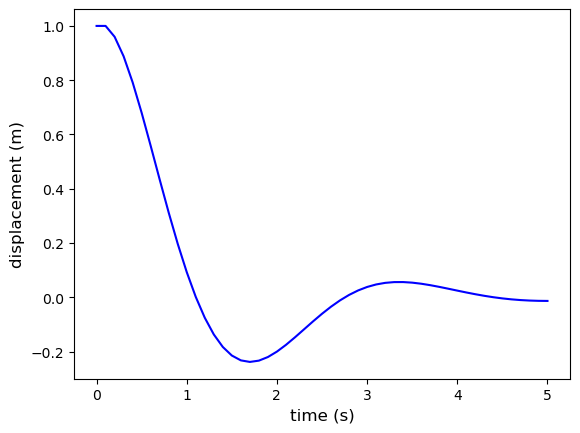

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define Euler method function
def euler(f, tspan, y0, h):

    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, len(y0)))
    t[0] = tspan[0]
    y[0,:] = y0
    
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h

    return t, y


# Define Mass-Spring model
def spring(t, y):
    return np.array([ y[1], (- c * y[1] - k * y[0]) / m ])
    

# Define IVP parameters
tspan = [0, 5]  # boundaries of the t domain
y0 = [1, 0]     # initial values
h = 0.1         # step length
m = 1;          # mass of object
c = 2;          # damping coefficient
k = 4;          # spring constant

# Solve the IVP using the Euler method
t, y = euler(spring, tspan, y0, h)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b-")
plt.xlabel("time (s)", fontsize=12)
plt.ylabel("displacement (m)", fontsize=12)
plt.show()

from myst_nb import glue
glue("spring_plot", fig, display=False)

## Code

The code below sets up and solves the mass-sprint-damper model example from {prf:ref}`spring-example` using the Euler method.

`````{tab-set}
````{tab-item} Python
```python
# Define mass-spring-damper model
def spring(t, y):
    return np.array([ y[1], (- c * y[1] - k * y[0]) / m ])
    

# Define IVP parameters
tspan = [0, 5]  # boundaries of the t domain
y0 = [1, 0]     # initial values
h = 0.1         # step length
m = 1;          # mass of object
c = 2;          # damping coefficient
k = 4;          # spring constant

# Solve the IVP using the Euler method
t, y = euler(spring, tspan, y0, h)
print(y)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b-")
plt.xlabel("time (s)", fontsize=12)
plt.ylabel("displacement (m)", fontsize=12)
plt.show()
```
````

````{tab-item} MATLAB
```matlab
% Define mass-spring-damper model
spring = @(t, y, m, c, k) [ y(2), (-c * y(2) - k * y(1)) / m];

% Define IVP parameters
tspan = [0, 5];  % boundaries of the t domain
y0 = [1, 0];     % initial values [S, I, R]
h = 0.1;         % step length
m = 1;           % mass of object
c = 2;           % damping coefficient
k = 4;           % spring constant

% Solve the IVP using the Euler method
[t, y] = euler(@(t, y)spring(t, y, m, c, k), tspan, y0, h);

% Plot solution
plot(t, y(:, 1), 'b-', LineWidth=2)
xlabel('time (s)', Fontsize=14, Interpreter='latex')
ylabel('displacement (m)', Fontsize=14, Interpreter='latex')
axis padded
```
````
`````